# JupyterNotebookの基礎

## 導入

[JupyterNotebook入門](JupyterNotebookIntroduction.ipynb)

[LC4RI入門](LC4RI_Introduction.ipynb)

## 解説

### レジリエンスの三角形

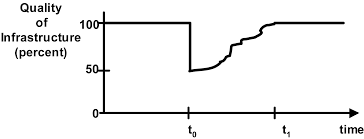

Michel Bruneau, Stephanie E. Chang, Ronald T. Eguchi, George C. Lee, Thomas D. O’Rourke, Andrei M. Reinhorn, Masanobu Shinozuka, Kathleen Tierney, William A. Wallace, and Detlof von Winterfeldt (2003) A Framework to Quantitatively Assess and Enhance the Seismic Resilience of Communities. Earthquake Spectra: November 2003, Vol. 19, No. 4, pp. 733-752.

インシデントが起きた時、どこまで壊れるか、いつまでに直せるか、で失われる価値が決まります。情報システムの場合「どこまで壊れるか」は設計に寄るので、システム運用前に決まってしまいます。「いつまでに直せるか」は、予測できるものは事前に準備しておけますが、予想外のものについては、運用チームが対象システムをどこまで掌握しているか、が大きく影響します。

LC4RI（Literate Computing for Reproducible Infrastructure）は、Jupyter Notebookを使った運用によって、運用チームが対象システムを理解することを手助けします。作業と、結果と、知見を、見える化して、運用チームで共有することを手助けします。運用チームが対象システムを掌握し、予想外の事態が起こった時にも、対処できそうなオプションを考えられるようにします。また、蓄積されたNotebookを再利用することで、作業の速度と正確性が期待できるので、予測される事態への事前準備にもなります。運用チームが得た対象システムの理解から、対象システムの弱点も見つけることができ、情報システムの構成を修正することもできます。

### 自動化レベル（Levels of automation）

Sheridan & Verplanck 1978、Inagaki 1998

| 自動化レベル | 概要 |
|:----------:|:----|
|1|コンピュ－タの支援なしに，すべてを人間が決定・実行．|
|2|コンピュ－タはすべての選択肢を提示し，人間はそのうちのひとつを選択して実行．|
|3|コンピュ－タは可能な選択肢をすべて人間に提示するとともに，その中のひとつを 選んで提案．それを実行するか否かは人間が決定．|
|4|コンピュ－タは可能な選択肢の中からひとつを選び，それを人間に提案．それを実行するか否かは人間が決定．|
|5|コンピュ－タはひとつの案を人間に提示．人間が了承すれば，コンピュ－タが実行．|
||L1〜L5：人間が許可しないと実行しない|
||L6〜L10：人間の許可を待たずに実行|
|6|コンピュ－タはひとつの案を人間に提示．人間が一定時間以内に実行中止を指令しない限り，コンピュ－タはその案を実行．|
|6.5|コンピュ－タはひとつの案を人間に提示すると同時に，その案を実行．|
|7|コンピュ－タがすべてを行い，何を実行したか人間に報告．|
|8|コンピュ－タがすべてを決定・実行．人間に問われれば，何を実行したか人間に報告．|
|9|コンピュ－タがすべてを決定・実行．何を実行したか人間に報告するのは， 必要性をコンピュ－タが認めたときのみ．|
|10|コンピュ－タがすべてを決定し，実行．|

運用の自動化を考えた場合、コードで表現されているが、適時、人間が介在する「自動化」なのか、コードが自動実行され、人間が介在しない「自動化」なのか、区別して考える必要があります。ステークホルダと話す場合にも、表現を明確にしないと、理解がズレてしまう危険があります。

LC4RIでは、Jupyter Notebookを使って、まず、人間が介在する「自動化」を行います。人間が介在しない「自動化」は、サービスに対して副作用がない（情報を取得するだけの操作、運用チームしか使わないサブシステムの操作）、長期間同じ手順で問題がない（対象システムが変化しにくい部分を触る操作）、といったケースに限って、Notebookをスケジューラで実行（ex:[papermill](https://papermill.readthedocs.io/en/latest/)）します。

### Infrastructure as Code（IaC）

CLI操作で構成された運用手順書が、フォルダ（物理）やPDFで存在する場合、その内容をNotebook化することは、それほど難しくありません。手順書の操作が正しく動くのであれば、Notebookベースの運用を始めることができます。対象システムの操作を、実行できるコードで表現する手法を「IaC」と呼びます。LC4RIはIaCを基盤としています。

IaCで扱いにくい操作として、アカウント情報の扱いと、GUI/対話型UIがあります。

Notebook上で、アカウント情報を引数にしたり、環境変数に設定したりすると、その情報が実行セルや出力に残ってしまうので、Notebookを共有しにくくなります。これに対処するために、マークダウンセルで、アカウント情報を使った操作をターミナルで実行するよう説明を書くなどの方法があります。

GUIや対話型UIの操作が必要な場合も、Jupyter Notebookの実行セルで操作することができません。対話型の操作が求められるコマンドでも、オプションによって、対話型でない操作が可能な場合もあるので、その場合は、実行セルで操作できます。実行セルで操作できない場合は、マークダウンセルで、GUIや対話型UIの操作について説明を書くなどの方法で対処します。近年のトレンドとしては、GUI操作ができるものでも、全ての操作をAPI経由でも操作できるという設計の製品が増えていますので、評価や選定の際に、IaCとの親和性を見ると良いでしょう。

## 資料

[JANOG44ハッカソン「自動棚卸し」2019-07-26](https://www.janog.gr.jp/meeting/janog44/program/hackwin)

[JANOG44「簡単? JupyterNotebook+Ansibleを使った作業手順書自動生成」2019-07-25](https://www.janog.gr.jp/meeting/janog44/program/lt4)

[JANOG44「Jupyter Notebookの拡張機能を使ってリモート機器にSSHして作業する」2019-07-24](https://www.janog.gr.jp/meeting/janog44/program/llt)

NIIオープンフォーラム2019「LC4RI」2018-05-29

[トップエスイー「MicroOpsCI with LC4RI～Notebook手順書にCIを適用する～」2019-03-22](https://www.topse.jp/images/%E3%82%BD%E3%83%95%E3%83%88%E3%82%A6%E3%82%A7%E3%82%A2%E9%96%8B%E7%99%BA%E5%AE%9F%E8%B7%B5%E6%BC%94%E7%BF%92%E3%83%9D%E3%82%B9%E3%82%BF%E3%83%BC_30P1.pdf)

情報処理学会IOT44「SSH Kernel: Jupyter Notebookでサーバの遠隔運用手順を実行・記録するJupyter拡張の開発」2019-03-07

情報処理学会IOT44「Notebookを介した作業ノウハウの継承・移転を分析するための基盤」2019-03-07

[JANOG43野良BoF「Colaboratoryで体験！はじめてのコード化」2019-01-25](https://gist.github.com/mnagaku/8cdbe8421f41fcc272c9f1eded60d080)

[AXIES2018年次大会「Academic Baremetal Cloudの実現」2018-11-19](https://goo.gl/X9nFzU)

[トップエスイー「クラウド上での運用を効率化 環境を提供する仕組みをサービスとして捉える『PaaSaaS』」2018-10-02](https://codezine.jp/article/detail/11050)

JulyTechFesta2018「Jupyter Notebookが変える、あなたのチームの運用作業」2018-07-29

[JANOG42『その運用自動化では行き詰まる 〜「つながらない」「つたわらない」「つみあがらない」を防ぐために〜』2018-07-12](https://www.janog.gr.jp/meeting/janog42/program/OPE)

第2回HPCOPS研究会「NIIでの計算機環境の運用及び、Literate Computing(for reproducible infrastructure)について」2018-07-02

NIIオープンハウス2018「作業証跡、再現性、技能移転……情報システム運用の諸問題を一挙に解決 / 独自拡張した Jupyter Notebook による、『実行できる手順書』」2017-06-22

NIIオープンフォーラム2018「LC4RIハンズオン」2018-06-21

情報処理学会IOT40「Literate Computing for Reproducible Infrastructure を用いた WiFi ネットワーク構築手順の作成」2018-03-05

[学術情報メディアセンターセミナー「Jupyter Notebook による教育研究支援環境の構築と利用」2018-01-30](http://www.media.kyoto-u.ac.jp/accms_web/event/1311.html)

[JANOG41「Literate Computing for Reproducible Infrastructure」2018-01-26](https://www.janog.gr.jp/meeting/janog41/program/sp8lcri)

[「Jupyter+Ansibleを使ったインフラ運用のはじめかた」2018-01-07](https://qiita.com/yacchin1205/items/809f715a00e170a9583f)

[Jupyter Advent Calendar 2017 16日目「Literate Computing の藪のなか」2017-12-16](https://scrapbox.io/Literate-Computing/Literate_Computing_%E3%81%AE_%E8%97%AA%E3%81%AE%E3%81%AA%E3%81%8B)

[AXIES2017年次大会「Literate Computing for Reproducible Infrastructure による研究・教育環境の構築と運用」2017-12-13](https://goo.gl/BSzYtN)

[Jupyter Advent Calendar 2017 9日目「Jupyter+Ansibleを使ったインフラ運用の考え方2017」2017-12-09](https://qiita.com/yacchin1205/items/8bd1b79942418e0d0888)

[Jupyter Advent Calendar 2017 4日目「魔改造したJupyterでイベント会場のWiFi環境を爆誕させる話」2017-12-04](https://qiita.com/mnagaku/items/08fdfd43b99348887cd6)

[NetOpsCoding#5 × ネットワークプログラマビリティ勉強会#13「Literate Computing for Reproducible Infrastructure」2017-10-10](https://github.com/mnagaku/evaluation-tracer/blob/master/lt20171010.md)

[JupyterCon「Collaboration and automated operation as literate computing for reproducible infrastructure」2017-08-25](https://www.slideshare.net/nobu758/jupytercon-2017-collaboration-and-automated-operation-as-literate-computing-for-reproducible-infrastructure)

[第20回Elasticsearch勉強会「Jupyterで手順再現！Elasticsearch構築・運用を実行可能ドキュメントで機械化してみた」2017-07-31](https://www.slideshare.net/yacchin/jupyterelasticsearch)

電子情報通信学会技術研究報告「SINETを活用したインタークラウド環境構築システムの開発」2017-07-26

[NIIオープンハウス2017「運⽤作業の証跡も、再利⽤する⼿順の記述も、教材作成もNotebookでやってみる」2017-06-09](http://www.nii.ac.jp/event/openhouse/2017/upload/B14.pdf)

[トップエスイー「Windowsクライアント環境構築におけるLiterate Computing for Infrastructure の適用」2017-03-24](http://files.topse.jp/posters/pdf/topse28011.pdf)

[jupyter notebook Advent Calendar 2016「Jupyter+Ansibleを使ったインフラ運用のための下準備」2016-12-10](https://qiita.com/yacchin1205/items/928c2d53c307f18b587f)

[Internet Week 2016「国立情報学研究所におけるクラウド運用のJupyter NotebookとAnsibleによる機械化とその効能」2016-11-30](https://www.nic.ad.jp/ja/materials/iw/2016/proceedings/d2/d2-2-yazawa-2.pdf)

[July Tech Festa 2016「ベアメタルクラウドの運用をJupyter NotebookとAnsibleで機械化してみた」2016-07-24](https://www.slideshare.net/yacchin/jupyter-notebookansible)

[「Jupyter notebook を用いた文芸的インフラ運用のススメ」2016-07-01](https://www.slideshare.net/nobu758/jupyter-notebook-63167604)

[「Jupyterで運用やってみた」2016-07-01](https://www.slideshare.net/yacchin/jupyter-63698323)

[NII学術情報基盤オープンフォーラム2016「インタークラウドを実現する技術」2016-05-27](https://www.nii.ac.jp/csi/openforum2016/track/pdf/20160527AM_REDHAT_nakai.pdf)

[「Jupyter&Ansibleで『手順書 as a Code』を実現？！」2016-04](https://www.school.ctc-g.co.jp/columns/nakai/nakai88.html)

[「Literate Automation(文芸的自動化)についての考察」2016-04-22](http://enakai00.hatenablog.com/entry/2016/04/22/204125)

[Docker Meetup Tokyo #6「DockerでJupyter使おうぜ」2016-03-05](https://www.slideshare.net/yacchin/dockerjupyter)

[「Literate computing for reproducible infrastructure - our basic practices in a video capture -」2016-03-04](https://www.slideshare.net/nobu758/literate-computing-for-reproducible-infrastructure-our-basic-practices-in-a-video-capture)

[Hadoop/Spark Conference Japan 2016「運用作業の証跡も,再利用する手順の記述も,教材作成も Literate Computing でやってみる」2016-02-08](https://www.slideshare.net/nobu758/hcj2016-lt-literate-computing)

[Hadoop/Spark Conference Japan 2016「NIIでいろいろなHadoop環境(だけじゃないけど)を作ったり壊したり動かし続けたりしている話」2016-02-08](https://www.slideshare.net/yacchin/niihadoop)

京都大学 学術情報メディアセンターセミナー「Jupyter Notebookを用いたインフラ・コード化の実践」2016-01-26

[ACSI2016「Literate Computing for Reproducible Infrastructure」2016-01-19](https://www.slideshare.net/nobu758/literate-computing-for-reproducible-infrastructure)

[電子情報通信学会技術研究報告「Literate Computing for Infrastructure - インフラ・コード化の実践におけるIPython (Jupyter) Notebookの適用」2015-06-05](https://www.slideshare.net/nobu758/literate-computing-for-infrastructure-ipython-jupyter-notebook)